In [62]:
import numpy as np
import pickle

SIZE = 64

def load_images():
    """Load MNIST images from file."""
    with open('../mnist/mnist_pics.pkl', 'rb') as file:
        images = pickle.load(file)
    return images

def uniform_fragments(*args, **kwargs):
    size = kwargs['size']
    n_fragments = kwargs['n_fragments']
    xs = np.random.randint(0, 28 - size, n_fragments)
    ys = np.random.randint(0, 28 - size, n_fragments)
    return xs, ys

def uniform(size):
    return np.random.randint(0, SIZE-size, 2)

def normal(size):
    return list(map(int, np.random.normal(SIZE/2, SIZE/4, 2)))

def crop_images(images, coordinates):
    images_for_noise = []
    for i in range(len(images)):
        image = images[i]
        coord = coordinates[i]
        images_for_noise.append(image[coord[0]:coord[0] + 28, coord[1]:coord[1] + 28])
    return images_for_noise

def create_fragments(images, size, distr):
    """Cut fragment from each."""
    fragments = []
    for image in images:
        x, y = np.random.randint(0, 28-size, 2)
        fragments.append(image[x:x+size, y:y+size])
    return fragments


def arrange_fragments(image, fragments, distr, level):
    for fragment in fragments:
        size = fragment.shape[0]
        x_fragment, y_fragment = globals()[distr](size)
        image_to_change = image[x_fragment:x_fragment+size, y_fragment:y_fragment+size]
        height_to_change, width_to_change = image_to_change.shape
        image_to_change = np.max([level*fragment[:height_to_change, :width_to_change], image_to_change], axis=0)
        image[x_fragment:x_fragment+size, y_fragment:y_fragment+size] = image_to_change
    return image

In [63]:
images = load_images()[:100]
level, n_fragments, size, distr = [0.9, 2, 27, 'uniform']

new_images = []
coordinates = []
for image in images:
    pure_mnist = image.reshape(28, 28)
    new_x, new_y = np.random.randint(0, SIZE-28, 2)
    large_mnist = np.zeros((SIZE, SIZE))
    large_mnist[new_x:new_x+28, new_y:new_y+28] = pure_mnist
    new_images.append(large_mnist)
    coordinates.append((new_x, new_y))
    
images = new_images

ind_for_noise = np.random.choice(len(images), n_fragments)
images = [images[i] for i in ind_for_noise]
coordinates = [coordinates[i] for i in ind_for_noise]
images_for_noise = crop_images(images, coordinates)
fragments = create_fragments(images_for_noise, size, distr)
noise = arrange_fragments(image[0], fragments, distr, level)

IndexError: invalid index to scalar variable.

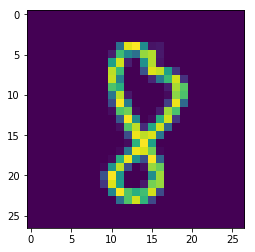

In [65]:
import matplotlib.pyplot as plt
plt.imshow(fragments[0])
plt.show()

In [54]:
fragments[1].shape

(27, 27)